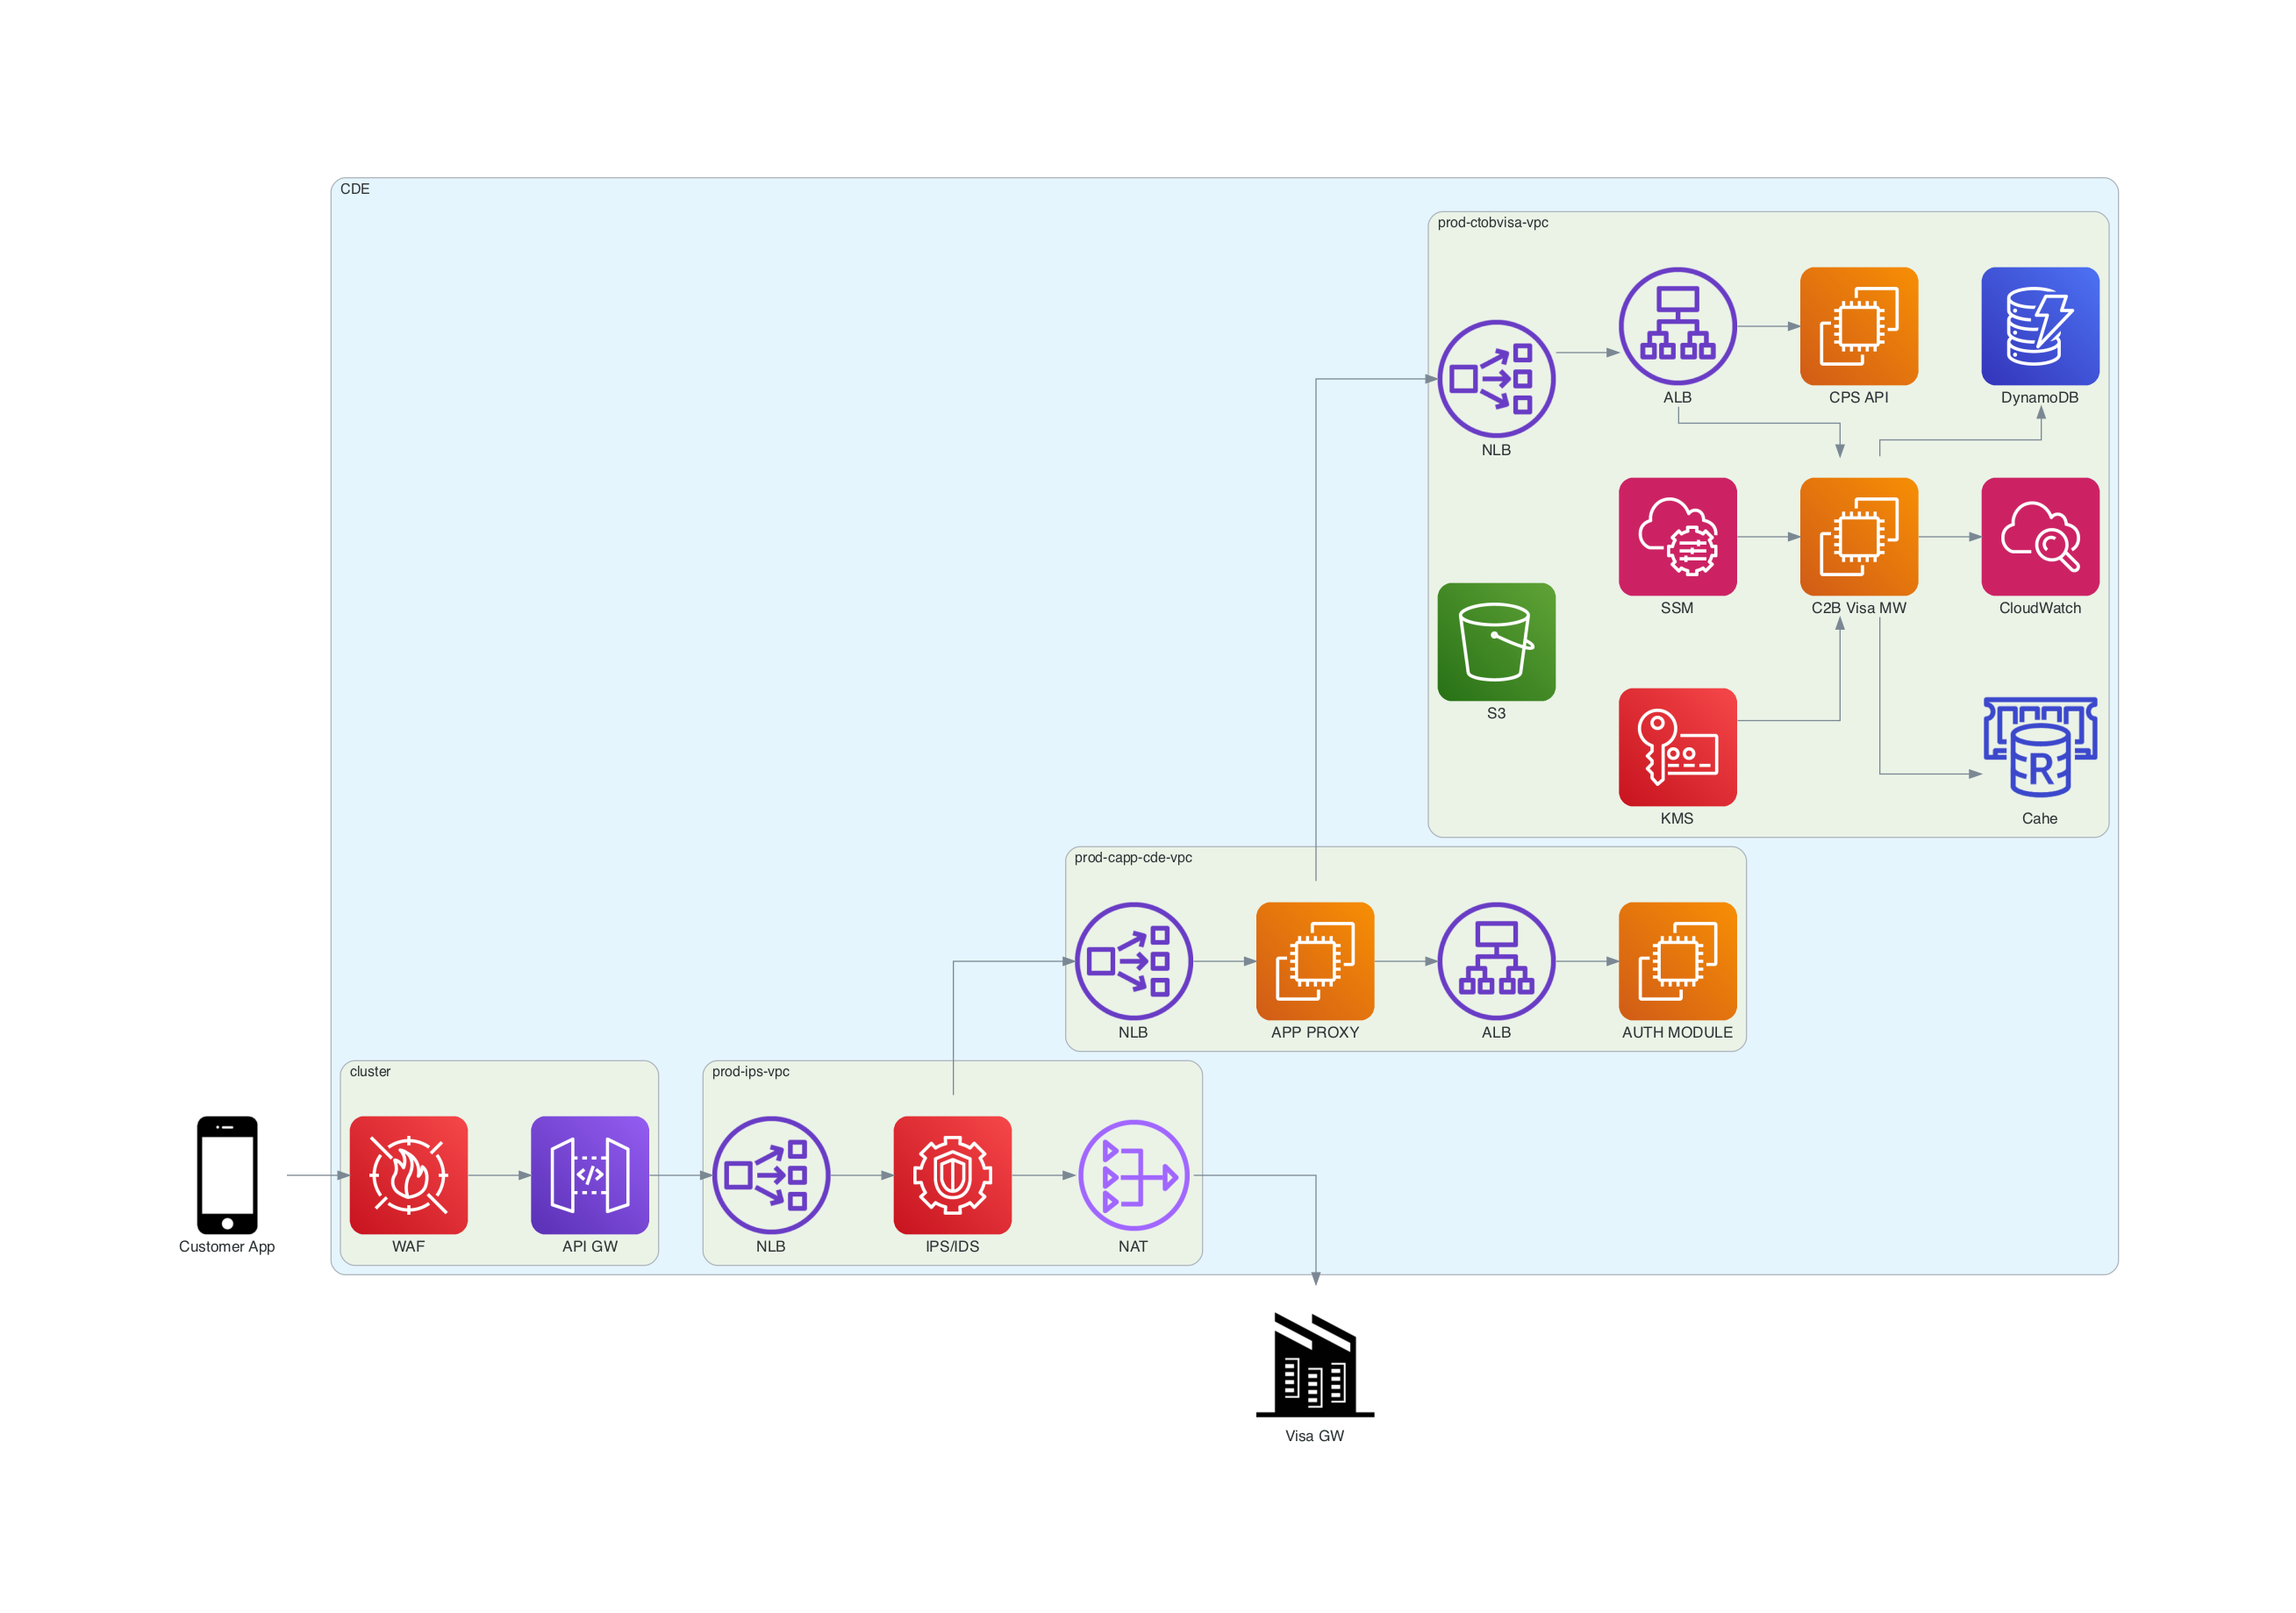

In [4]:
from diagrams import Cluster, Diagram
from diagrams.aws.network import APIGateway
from diagrams.aws.network import NLB
from diagrams.aws.network import NATGateway
from diagrams.aws.security import Guardduty
from diagrams.aws.security import WAF 
from diagrams.generic.device import Mobile
from diagrams.generic.place import Datacenter
from diagrams.aws.compute import EC2
from diagrams.aws.network import ElbApplicationLoadBalancer
from diagrams.aws.database import ElasticacheForRedis
from diagrams.aws.database import Dynamodb
from diagrams.aws.storage import SimpleStorageServiceS3
from diagrams.aws.management import Cloudwatch
from diagrams.aws.management import SystemsManager
from diagrams.aws.security import KeyManagementService

with Diagram(show=False, filename="diagram") as diag:
    app = Mobile("Customer App")
    visa = Datacenter("Visa GW")

    with Cluster("CDE"):
        with Cluster():
            waf = WAF("WAF")
            gw = APIGateway("API GW")
        with Cluster("prod-ips-vpc"):
            ips_nlb = NLB("NLB")
            ips = Guardduty("IPS/IDS")
            ips_nat = NATGateway("NAT")
        with Cluster("prod-capp-cde-vpc"):
            capp_nlb = NLB("NLB")
            capp_proxy = EC2("APP PROXY")
            capp_alb = ElbApplicationLoadBalancer("ALB")
            capp_module = EC2("AUTH MODULE")
        with Cluster("prod-ctobvisa-vpc"):
            c2b_nlb = NLB("NLB")
            c2b_alb = ElbApplicationLoadBalancer("ALB")
            c2b_cps = EC2("CPS API")
            c2b_visa_mw = EC2("C2B Visa MW")
            c2b_cache = ElasticacheForRedis("Cahe")
            c2b_s3 = SimpleStorageServiceS3("S3")
            c2b_cw = Cloudwatch("CloudWatch")
            c2b_db = Dynamodb("DynamoDB")
            c2b_ssm = SystemsManager("SSM")
            c2b_kms = KeyManagementService("KMS")        

    app >> waf >> gw >> ips_nlb
    ips_nlb >> ips >> ips_nat >> visa
    ips >> capp_nlb >> capp_proxy >> capp_alb >> capp_module
    capp_proxy >> c2b_nlb >> c2b_alb >> c2b_cps
    c2b_alb >> c2b_visa_mw >> c2b_cache
    c2b_visa_mw >> c2b_cw
    c2b_visa_mw >> c2b_db
    c2b_ssm >> c2b_visa_mw
    c2b_kms >> c2b_visa_mw
diag